**Coding Assignment 3**

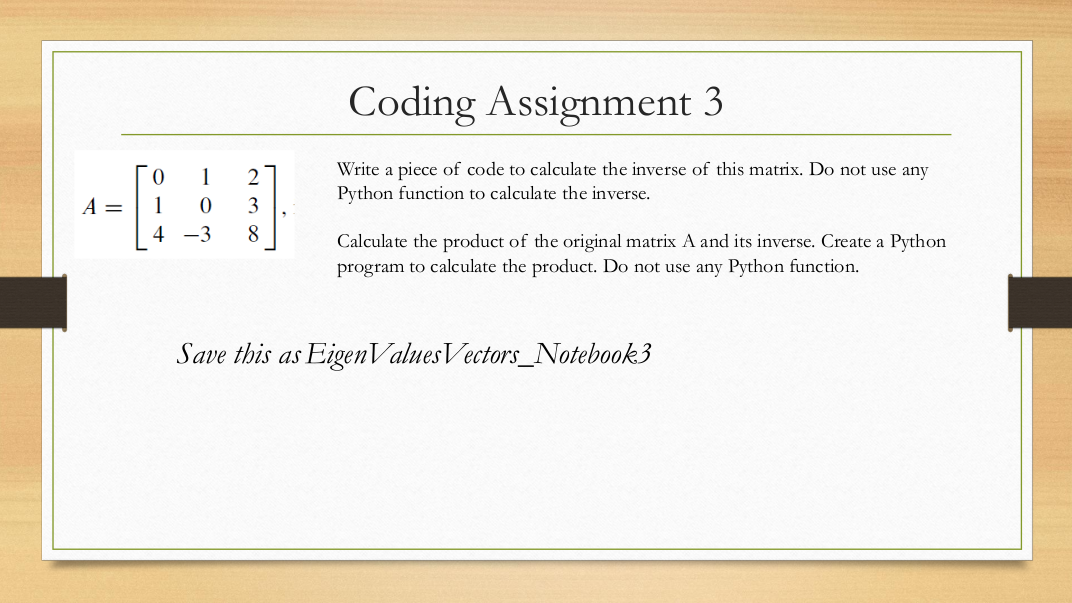

**Overview of the code:**

1. **Gauss Jordan Inversion Method Function**: The code defines a function named `gauss_inverse` that computes the inverse of a given matrix using the Gauss Jordan Inversion Method. It first creates an augmented matrix by appending the identity matrix to the original matrix. Then, it iterates through each column, finding pivot elements and performing row operations to make non-pivot elements zero. Finally, it extracts the inverse matrix from the augmented matrix.

2. **Matrix Multiplication Function**: Another function named `matrix_multiplication` is defined to multiply two matrices. It checks if the dimensions are compatible for multiplication and then performs the multiplication using nested loops.

3. **Original Matrix and Inverse Calculation**: The original matrix `A` is defined, and its inverse is calculated using the `gauss_inverse` function.

4. **Printing Results**: The inverse matrix is printed followed by the original matrix after transformation by the Gauss Jordan Inversion method.

5. **Matrix Multiplication and Result Display**: The `matrix_multiplication` function is called to multiply the original matrix `A` with its inverse. The resultant matrix is displayed.

6. **Conculsion:** We can see that after finding the resultant matrix which is obtained by multiplying the original matrix and its inverse, is a ***Identity matrix***

In [59]:
# Defining the function to find the inverse of the matrix by Gauss Jordan Inversion Method
def gauss_inverse(matrix):
    # Making a copy of the matrix
    aug_matrix = [row[:]for row in matrix]
    rows = len(aug_matrix)
    columns = len(aug_matrix[0])

    # Adding the Identity matrix as augumented matrix
    for i in range(rows):
        for j in range(columns):
            if(i ==j):
                aug_matrix[i].append(1)
            else:
                aug_matrix[i].append(0)

    # Iterating over each column
    for j in range(columns):
        pivot_row = None
        for i in range(j,rows):
            if(aug_matrix[i][j] != 0):
                pivot_row = i
                break
        # If there is no pivot row, then the matrix is singular.
        if pivot_row == None :
            raise ValueError("Matrix is Singular. So, It cant have Inverse")

        # Swapping the rows 
        aug_matrix[j],aug_matrix[pivot_row] = aug_matrix[pivot_row], aug_matrix[j]

        # Dividing the pivot element row by pivot value
        pivot_value = aug_matrix[j][j]
        for k in range(len(aug_matrix[0])):
            aug_matrix[j][k] = aug_matrix[j][k] / pivot_value

        # Making the non-pivot elements to zero
        for i in range(rows):
            if i != j:
                multiplier = aug_matrix[i][j]
                for k in range(len(aug_matrix[0])):
                    aug_matrix[i][k] -= multiplier * aug_matrix[j][k]

    inverse_matrix = [row[columns:] for row in aug_matrix]

    return inverse_matrix,aug_matrix

In [60]:
# Origial matrix
A = [[0, 1, 2],
     [1, 0, 3],
     [4, -3, 8]
    ]
# Finding the inverse by calling the function
inverse_matrix,aug_matrix = gauss_inverse(A)

# Printing the Inverse Matrix
print("Inverse Matrix",end = '\n')
for row in inverse_matrix:
    print(row)

print("\n")
# Printing the Original matrix after transformation by Gauss Jordan Inversion
print("Original matrix after transformation")
for row in aug_matrix:
    print(row[:len(A[0])])

Inverse Matrix
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]


Original matrix after transformation
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]


In [61]:
# Defining the function for matrix multiplication
def matrix_multiplication(matrix,inverse_matrix):
    if(len(matrix[0]) != len(inverse_matrix)):
        print("Matrix Multiplication is not possible")

    # Implemnting matrix multiplication
    result = []
    # Iterating through rows of matrix 
    for i in range(len(matrix)):
        # Iterating through columns of Inverse matrix
        temp_row = []
        for j in range(len(inverse_matrix[0])):
            sum = 0
            # Iterating through the rows of inverse matrix
            for k in range(len(inverse_matrix)):
                # Each row element of matrix is multiplied with the column element of inverse matrix
                sum += matrix[i][k] * inverse_matrix[k][j]
            temp_row.append(sum)
        result.append(temp_row)

    return result

In [62]:
# Displaying the resultant matrix after multiplying the matrix with its inverse
print("Resultant Matrix")
Resultant_matrix = matrix_multiplication(matrix,inverse_matrix)
for row in Resultant_matrix:
    print(row)

Resultant Matrix
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
